In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('language_detection.csv')

print(df.head(5))

print("\n ================================================== \n")

print(df["language"].value_counts())












                                                Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64


Estonian  0
Swedish   1
Thai      2
Tamil     3
Dutch     4
Japanese  5
Turkish   6
Latin     7
Urdu      8
Indonesia 9
Portugese 10
French 11
Chinese 12
Korean 13
Hindi 14
Spanish 15
Pushto 16
Persian 17
Romanian 18
Russian 19
English 20
Arabic 21


In [ ]:
df['code'] = pd.factorize(df['language'])[0]

In [ ]:
#a
X_CountVectorizer = CountVectorizer()
X_TfidfTransformer = TfidfTransformer()

In [ ]:
sample = df.groupby("language").sample(n=30, random_state=42).reset_index()
#print(sample["language"].value_counts())

print(sample.head())

   index                                               Text language  code
0  11518  كوسوفو أدان وزير الخارجية في الكوسوفو بشدة هذا...   Arabic    21
1  16117  تاريخياً قسمت اسكتلندا إلى  مقاطعة county أو ر...   Arabic    21
2  16225  ومع زوال التمييز العنصري تدريجيا في جنوب أفريق...   Arabic    21
3  14448  تقع المحمية الوطنية "يلوستون" فوق نقطة ساخنة ح...   Arabic    21
4   9161  إنَّ تتبـُّعَ كتب الجاحظ ورسائله يكشفُ لنا عن ...   Arabic    21


In [ ]:
texto_counts = X_CountVectorizer.fit_transform(sample.Text)

tfidf_vectors = X_TfidfTransformer.fit_transform(texto_counts)

In [ ]:
svd = TruncatedSVD(n_components=2)
reduced_matrix =  svd.fit_transform(tfidf_vectors)
principalDf = pd.DataFrame(data = reduced_matrix, columns = ['svd1', 'svd2'])


Text(0, 0.5, 'SVD 2')

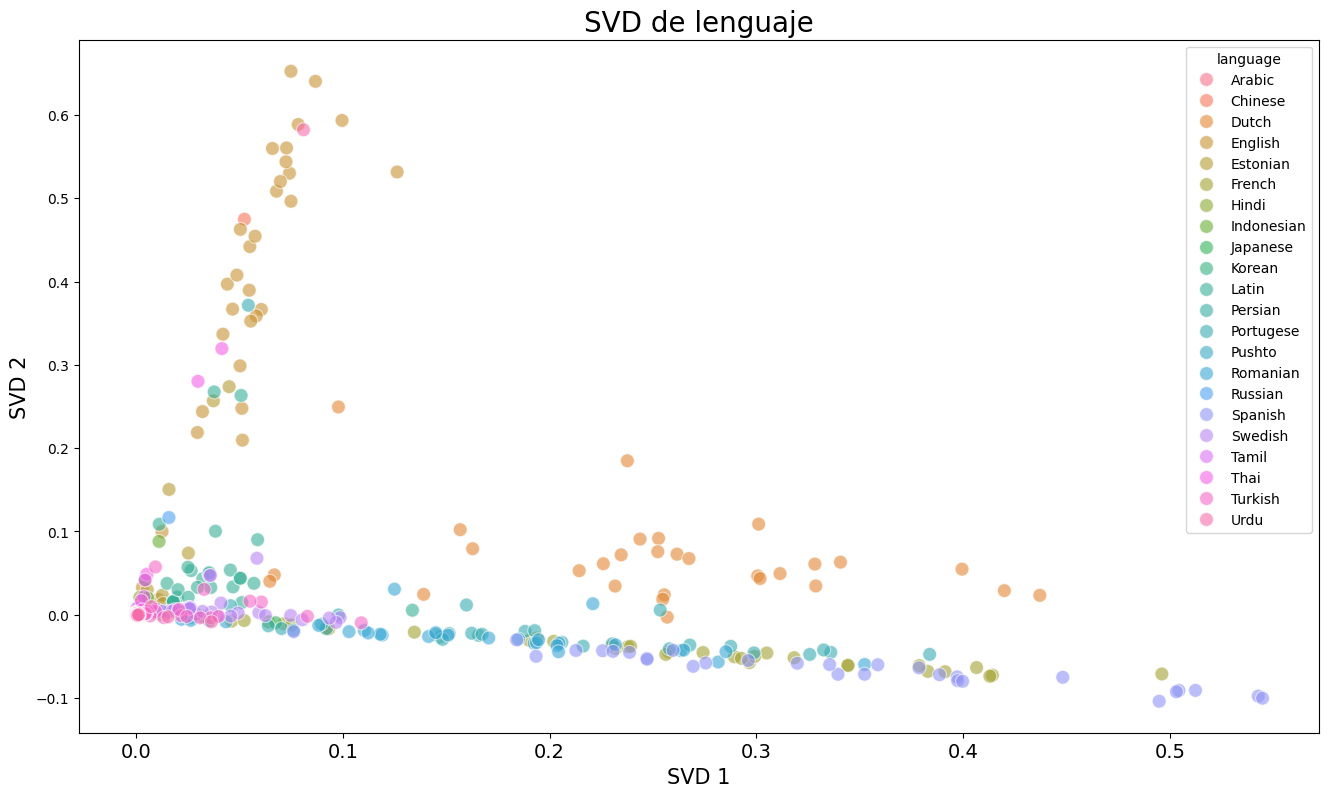

In [ ]:

finalDf = pd.concat([principalDf, sample.language], axis = 1)

plt.figure(figsize = (16, 9))

sns.scatterplot(x = "svd1", y = "svd2", data = finalDf, hue = "language", alpha = 0.6, s = 100);


plt.title('SVD de lenguaje', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("SVD 1", fontsize = 15)
plt.ylabel("SVD 2", fontsize = 15)

In [ ]:
#Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(df.Text,
                                                    df.language,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    shuffle=True)



X_train_counts = X_CountVectorizer.fit_transform(X_train)
X_train_tfidf = X_TfidfTransformer.fit_transform(X_train_counts)

X_test_counts = X_CountVectorizer.transform(X_test)
X_test_tfidf = X_TfidfTransformer.transform(X_test_counts)



In [ ]:
#Model Creating
model = MultinomialNB()

model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test,y_pred))




              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       249
     Chinese       0.95      0.50      0.65       254
       Dutch       0.99      0.98      0.98       268
     English       0.69      1.00      0.81       239
    Estonian       0.99      0.96      0.98       248
      French       0.93      0.99      0.96       239
       Hindi       1.00      0.98      0.99       264
  Indonesian       0.98      0.98      0.98       258
    Japanese       0.98      0.62      0.76       250
      Korean       1.00      0.98      0.99       246
       Latin       0.99      0.90      0.94       260
     Persian       1.00      1.00      1.00       242
   Portugese       1.00      0.96      0.98       256
      Pushto       1.00      0.97      0.98       255
    Romanian       0.98      0.98      0.98       247
     Russian       0.98      0.99      0.99       249
     Spanish       0.97      1.00      0.98       238
     Swedish       0.60    

In [ ]:
get_code = pd.merge(y_train, df, left_index=True, right_index=True)
codes_y_train  = get_code["code"]

get_code_test = pd.merge(y_test, df, left_index=True, right_index=True)
codes_y_test  = get_code["code"]


In [ ]:
regr = LogisticRegression()



regr.fit(X_train_tfidf, codes_y_train)


LogisticRegression()

In [ ]:
y_pred = regr.predict(X_test_tfidf)
print(classification_report(codes_y_test,y_pred))

In [ ]:


text = "Hola, me quiero morir por favor"

text = [text]

text_counts = X_CountVectorizer.transform(text)

#Prediction Processing
prediction = model.predict(text_counts)

f"Prediction is {prediction[0]}"

In [ ]:
def predice(texto):

text = [texto]

text_counts = X_CountVectorizer.transform(text)

#Prediction Processing
prediction = model.predict(text_counts)

f"Prediction is {prediction[0]}"